In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk
import sys

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist


In [28]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [29]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [30]:
print(X_train.reshape(X_train.shape[0], -1).shape)
print(X_test.reshape(X_test.shape[0], -1).shape)


# 2차원으로 변경
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

(60000, 784)
(10000, 784)


In [31]:
X_train.dtype # 현재 데이터 타입 확인

dtype('uint8')

In [32]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255  # float로 데이터 타입 변경


# X_train = to_categorical(X_train,10)
# X_test = to_categorical(X_test, 10)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)



In [39]:
early_stop = EarlyStopping(monitor='val_loss', verbose=0, patience=10)

model = Sequential()  # flatten= 사용 가능
model.add(Dense(500, activation='relu', input_dim=X_train.shape[1]))
# model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=100, batch_size=500, validation_split=0.25, callbacks=[early_stop],verbose=1)

print(model.evaluate(X_test, y_test))

Epoch 1/100
90/90 [==============================] - 2s 19ms/step - loss: 0.4721 - accuracy: 0.8744 - val_loss: 0.2464 - val_accuracy: 0.9295
Epoch 2/100
90/90 [==============================] - 2s 19ms/step - loss: 0.2057 - accuracy: 0.9421 - val_loss: 0.1851 - val_accuracy: 0.9479
Epoch 3/100
90/90 [==============================] - 2s 19ms/step - loss: 0.1496 - accuracy: 0.9576 - val_loss: 0.1490 - val_accuracy: 0.9567
Epoch 4/100
90/90 [==============================] - 1s 16ms/step - loss: 0.1129 - accuracy: 0.9692 - val_loss: 0.1286 - val_accuracy: 0.9637
Epoch 5/100
90/90 [==============================] - 1s 15ms/step - loss: 0.0901 - accuracy: 0.9752 - val_loss: 0.1168 - val_accuracy: 0.9664
Epoch 6/100
90/90 [==============================] - 1s 16ms/step - loss: 0.0733 - accuracy: 0.9804 - val_loss: 0.1118 - val_accuracy: 0.9679
Epoch 7/100
90/90 [==============================] - 1s 16ms/step - loss: 0.0609 - accuracy: 0.9846 - val_loss: 0.1005 - val_accuracy: 0.9695
Epoch 

In [38]:
x_loss,x_acc=model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0688 - accuracy: 0.9801


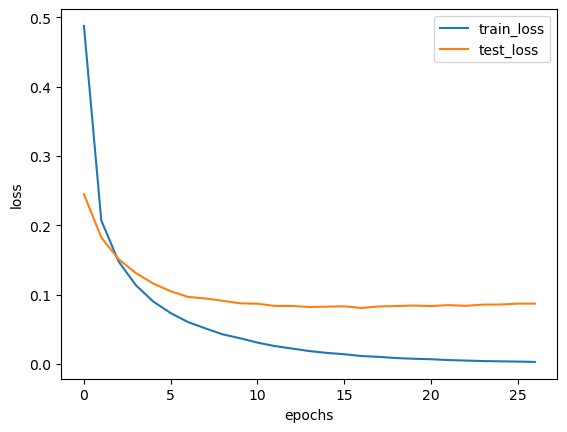

In [36]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_loss, label='train_loss')
plt.plot(x_len, y_vloss, label='test_loss')
plt.legend(loc='upper right')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()